In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Calculate the weight of the filter bank
def GetW(Nfft,P=4):
    M=Nfft*P
    W=np.arange(0,M,1)
    flt=np.zeros([M])
    #P=P-1
    flt[0:P-2]=1;
    flt[P-2]=0.5;
    flt[-P+3:]=1;
    flt[-P+2]=0.5;
    W=np.fft.ifft(flt).real #Imag part should be zero
    W=np.roll(W,M//2)
    return W*Nfft

#Apply the PFB to data
def fftw(A,W,P=4):
  Nfft=A.shape[-1]
  Dx=A[:,:-P,:]*W[:Nfft]
  for i in range(P-1):
    S=(i+1)*Nfft
    Dx+=A[:,i+1:-P+i+1,:]*W[S:S+Nfft]
  return (np.fft.fft(Dx,axis=2))


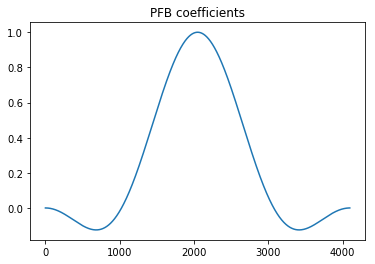

In [11]:
P=4
Nfft=1024; #FFT length
W=GetW(Nfft,P=P)
plt.plot(W);
plt.title("PFB coefficients");

In [22]:
#Load Data
Nc=3; #Number of channels

A=np.array(np.load("../LabTest8/D6b.npy")) #Raw ADC data
A-=65536*(A>65536//2)
print(A.shape)
[n1,n2,n3]=A.shape

A=A.reshape([n1,n3//Nfft,Nfft])
print(A.shape) #Channels*seconds, blocks, fft length

(192, 1, 131072)
(192, 128, 1024)


In [23]:
#Do FFT
F=fftw(A,W,P=P)
[n1,n2,n3]=F.shape
F=F.reshape([n1//Nc,Nc,n2,n3])
F=F.swapaxes(0,1)
F=F.reshape([Nc,n1//Nc*n2,n3])
print(F.shape) #channels, blocks, ffts

(3, 7936, 1024)


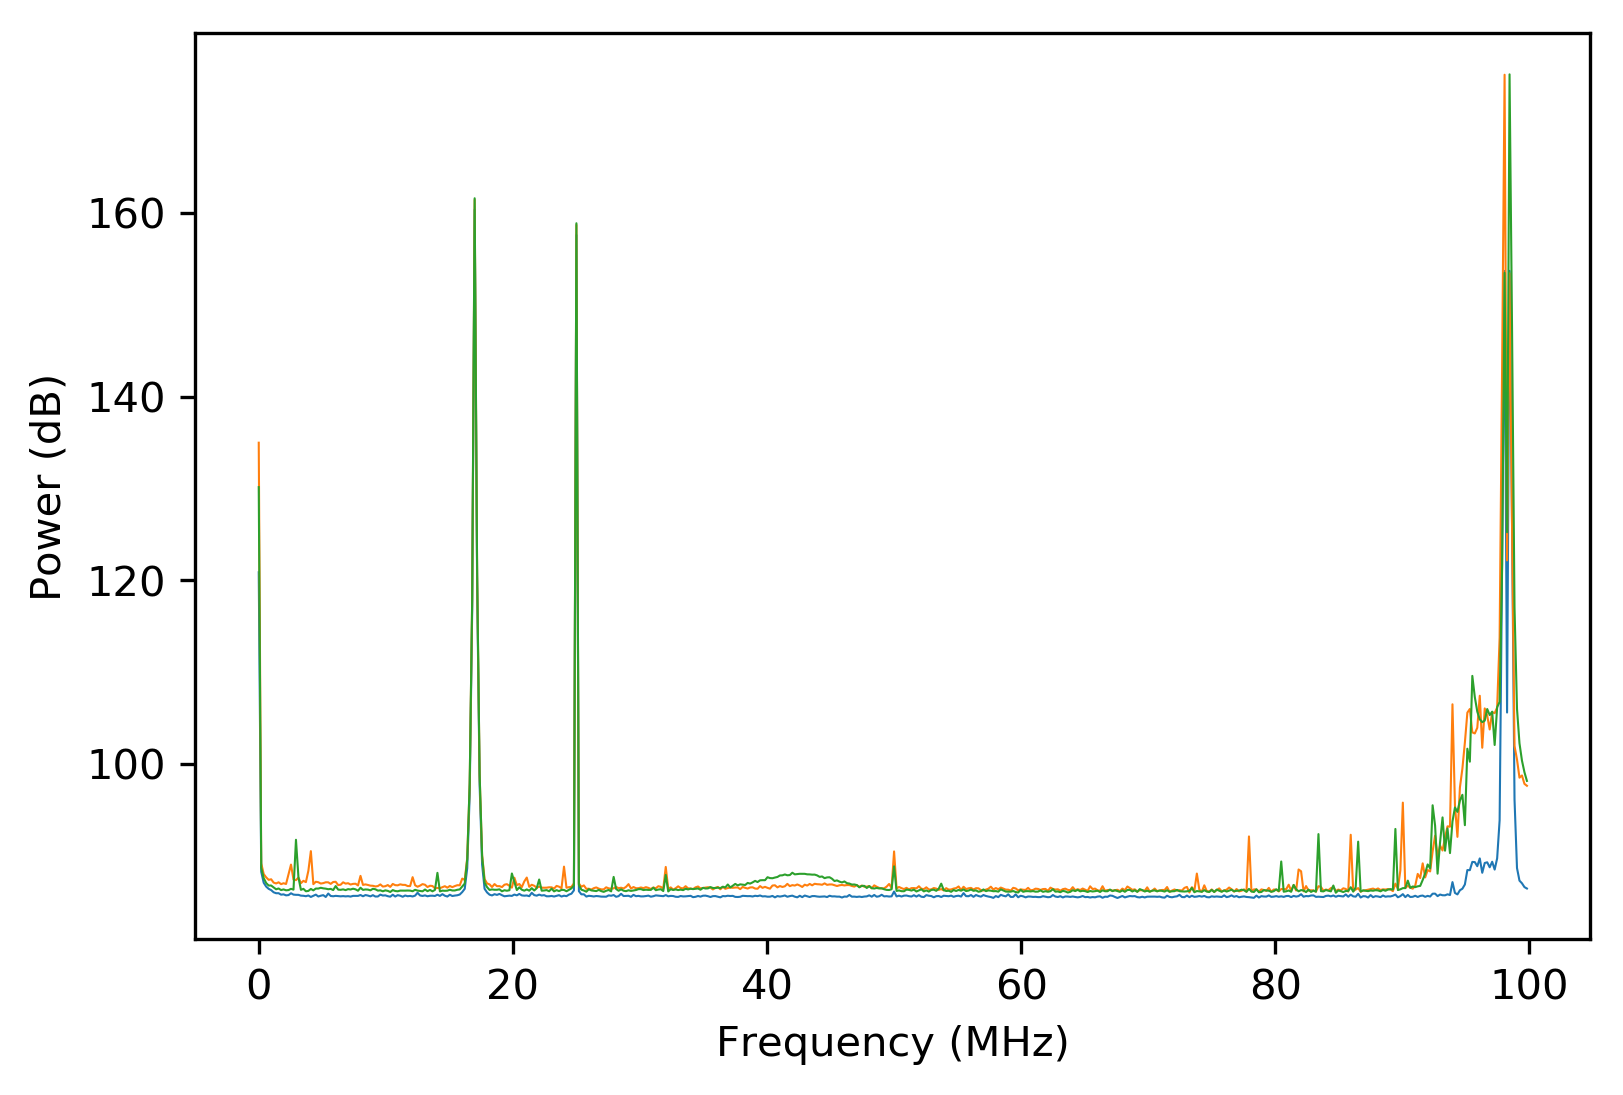

In [26]:
#plot power
FP=np.sum((F*F.conj()).real,axis=1)[:,:Nfft//2]
FP=10*np.log10(FP)
freq=np.arange(0,Nfft//2,1)/(Nfft//2)*100
plt.figure(dpi=300)
plt.plot(freq,FP.T,linewidth=0.5);
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB)")